<a href="https://colab.research.google.com/github/EduardaSantosDiniz/Vendas_supermecado/blob/main/vendas_supermecado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ Definição do Problema
Estamos trabalhando com dados de um supermercado.
Problema a ser solucinado é:

**Como aumentar o ticket médio das compras no supermercado, incentivando os clientes a gastarem mais por visita?**



---



**Outras perguntas a serem respondidas:**

*   Qual o perfil de cliente que mais compra determinado produto?

*   Qual é a cada categoria que mais vende produtos?

*   Qual é a sazonalidade das vendas? (Produtos que vendem mais em determinadas épocas do ano)

* Quais produtos têm maior margem de lucro?

* Qual o perfil dos clientes (por exemplo, idade, sexo, localização) que mais compram?NAO RESPODINDO

* Quais clientes compram produtos de maior valor?

* Qual é a frequência de compras dos clientes?

---


**Temos 1 problema para resolver e 07 perguntas para serem respondidas, eu irei responder uma de cada vez e depois criarei uma apresentação usando o Power Bi**

# 2️⃣Coleta de Dados




In [2]:
import pandas as pd

df = pd.read_csv('arquivo_mercado.csv')
print(df.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

# 3️⃣ Limpeza e Preparação dos Dados
Tratar valores ausentes, remover duplicatas e lidar com outliers.
Converter dados para formatos adequados (exemplo: transformar datas, padronizar textos, etc.).
Criar novas variáveis (feature engineering) se necessário.


In [3]:
#traduzindo as colunas para o português
df.columns = ['ramo0', 'ramo1', 'cidade', 'tipo_cliente', 'genero', 'categoria', 'preco_unitario', 'quantidade',
              'taxa_5%', 'total', 'data', 'tempo', 'pagamento', 'ramo2', 'ramo3', 'receita_bruta','ramo4']
#retirando as colunas que não vou utilizar
df = df.drop(columns = ['ramo0', 'ramo1','ramo2','ramo3','ramo4'])

#traduzinho as variaveis das colunas necessárias
df['tipo_cliente'] = df['tipo_cliente'].replace({
    'Member' : 'Membro',
    'Normal' : 'Normal'
})
df['genero'] = df['genero'].replace({
    'Female' : 'Feminino',
    'Male' : 'Masculino'
})
df['categoria'] = df['categoria'].replace({
    'Fashion accessories': 'Acessórios de moda' ,
    'Electronic accessories': 'Acessórios eletrônicos',
    'Food and beverages' : 'Comida e bebidas',
    'Sports and travel' : 'Esportes e viagens',
    'Home and lifestyle': 'Casa e estilo de vida',
    'Health and beauty' : 'Saúde e beleza'
})
df['pagamento'] = df['pagamento'].replace({
    'Ewallet' : 'Carteira_eletronica',
    'Cash' : 'Dinheiro',
    "Credit card" : "Cartao_credito"
})

#mostrando o resultado
print(df.head())

      cidade tipo_cliente     genero               categoria  preco_unitario  \
0     Yangon       Membro   Feminino          Saúde e beleza           74.69   
1  Naypyitaw       Normal   Feminino  Acessórios eletrônicos           15.28   
2     Yangon       Normal  Masculino   Casa e estilo de vida           46.33   
3     Yangon       Membro  Masculino          Saúde e beleza           58.22   
4     Yangon       Normal  Masculino      Esportes e viagens           86.31   

   quantidade  taxa_5%     total       data  tempo            pagamento  \
0           7  26.1415  548.9715   1/5/2019  13:08  Carteira_eletronica   
1           5   3.8200   80.2200   3/8/2019  10:29             Dinheiro   
2           7  16.2155  340.5255   3/3/2019  13:23       Cartao_credito   
3           8  23.2880  489.0480  1/27/2019  20:33  Carteira_eletronica   
4           7  30.2085  634.3785   2/8/2019  10:37  Carteira_eletronica   

   receita_bruta  
0        26.1415  
1         3.8200  
2        16

# 4️⃣ Análise Exploratória de Dados (EDA - Exploratory Data Analysis)
Criar gráficos e estatísticas para entender padrões e tendências.
Identificar correlações entre variáveis.
Descobrir possíveis insights iniciais.



**Pergunta:  Qual é a cada categoria que mais vende produtos?**

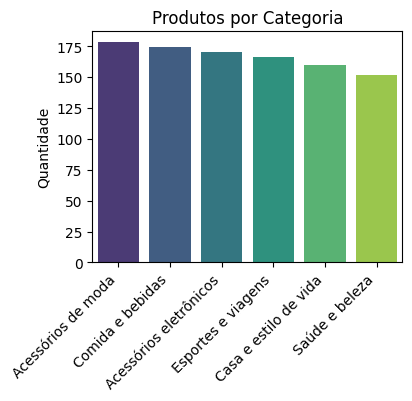

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output()

contagem_produtos = df['categoria'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=contagem_produtos.index,
            y=contagem_produtos.values,
            hue=contagem_produtos.index,
            dodge=False,
            legend=False,
            palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Quantidade')
plt.title('Produtos por Categoria')

plt.show()



**Olhando o resultado aparentemente é o Acessórios de moda, porém como a nossa base de dados divide por cliente, provavelmente este dado está errado devido a possibilidade de um cliente comprar 10 produtos de uma mesma categoria e ter o mesmo peso de um cliente que comprou apenas um.**



---

**Para respondermos a resposta de forma correta, temos que somar a quantidade vendida por categoria.**


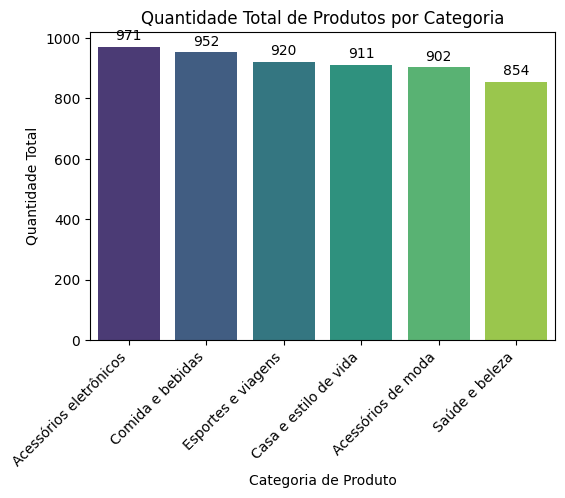

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

clear_output()

soma = df.groupby('categoria')['quantidade'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))

ax = sns.barplot(x=soma.index,
                 y=soma.values,
                 hue=soma.index,
                 dodge=False,
                 legend=False,
                 palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 8),
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Total')
plt.title('Quantidade Total de Produtos por Categoria')

plt.show()

**Qual o perfil dos clientes (por exemplo, tipo, sexo, localização) que mais compram?**

Para responder essa pergunta temos que agrupar as diferentes combinações que existem dos clientes, e logo depois disso verificar qual compram mais em valor total de compra.

In [6]:
perfil_compras = df.groupby(['cidade', 'genero', 'tipo_cliente'])['quantidade'].sum().reset_index()

perfil_compras = perfil_compras.sort_values(by='quantidade', ascending=False)

print(perfil_compras)

       cidade     genero tipo_cliente  quantidade
4   Naypyitaw   Feminino       Membro         548
5   Naypyitaw   Feminino       Normal         501
10     Yangon  Masculino       Membro         499
0    Mandalay   Feminino       Membro         479
8      Yangon   Feminino       Membro         465
3    Mandalay  Masculino       Normal         464
11     Yangon  Masculino       Normal         451
2    Mandalay  Masculino       Membro         445
9      Yangon   Feminino       Normal         444
7   Naypyitaw  Masculino       Normal         433
1    Mandalay   Feminino       Normal         432
6   Naypyitaw  Masculino       Membro         349


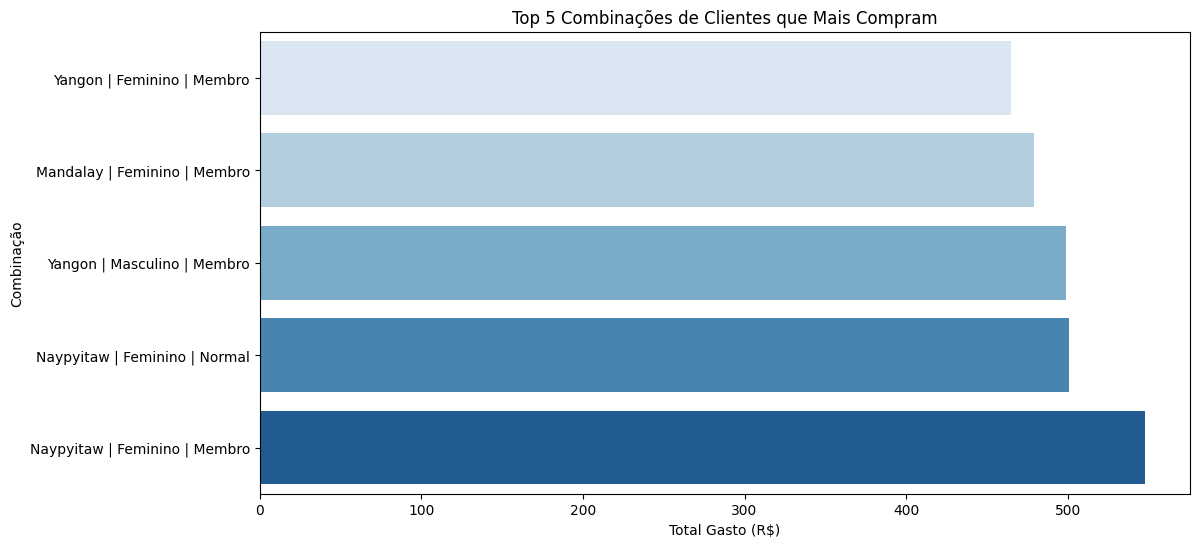

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

perfil_compras = df.groupby(['cidade', 'genero', 'tipo_cliente'])['quantidade'].sum().reset_index()

perfil_compras = perfil_compras.sort_values(by='quantidade', ascending=False)

top5 = perfil_compras.head(5).copy()

top5['combinação'] = top5['cidade'] + ' | ' + top5['genero'] + ' | ' + top5['tipo_cliente']

plt.figure(figsize=(12, 6))
sns.barplot(x='quantidade', y='combinação', data=top5, hue='combinação', palette='Blues_r', legend=False)

plt.xlabel("Total Gasto (R$)")
plt.ylabel("Combinação")
plt.title("Top 5 Combinações de Clientes que Mais Compram")
plt.gca().invert_yaxis()

plt.show()



**Quais clientes compram produtos de maior valor?**

Para responder essa pergunta temos que verificar a média do valor dos produtos e verificar quais estão acima da média para depois verificar qual o perfil dos clientes que mais compram esses produtos.

In [8]:
# Calcular a média do preço unitário
media_preco = df['preco_unitario'].mean()

# Filtrar apenas os valores acima da média
acima_da_media = df[df['preco_unitario'] > media_preco]

# Exibir os resultados
print(f"Média do preço unitário: R$ {media_preco:.2f}")
print("Produtos com preço acima da média:")
print(acima_da_media)


Média do preço unitário: R$ 55.67
Produtos com preço acima da média:
        cidade tipo_cliente     genero               categoria  \
0       Yangon       Membro   Feminino          Saúde e beleza   
3       Yangon       Membro  Masculino          Saúde e beleza   
4       Yangon       Normal  Masculino      Esportes e viagens   
5    Naypyitaw       Normal  Masculino  Acessórios eletrônicos   
6       Yangon       Membro   Feminino  Acessórios eletrônicos   
..         ...          ...        ...                     ...   
992     Yangon       Normal  Masculino  Acessórios eletrônicos   
994  Naypyitaw       Membro   Feminino  Acessórios eletrônicos   
996   Mandalay       Normal   Feminino   Casa e estilo de vida   
998     Yangon       Normal  Masculino   Casa e estilo de vida   
999     Yangon       Membro   Feminino      Acessórios de moda   

     preco_unitario  quantidade  taxa_5%      total       data  tempo  \
0             74.69           7  26.1415   548.9715   1/5/2019  1

<ipython-input-9-8348ff1d1c4c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantidade', y='combinação', data=top5, palette='Blues_r', legend=False)


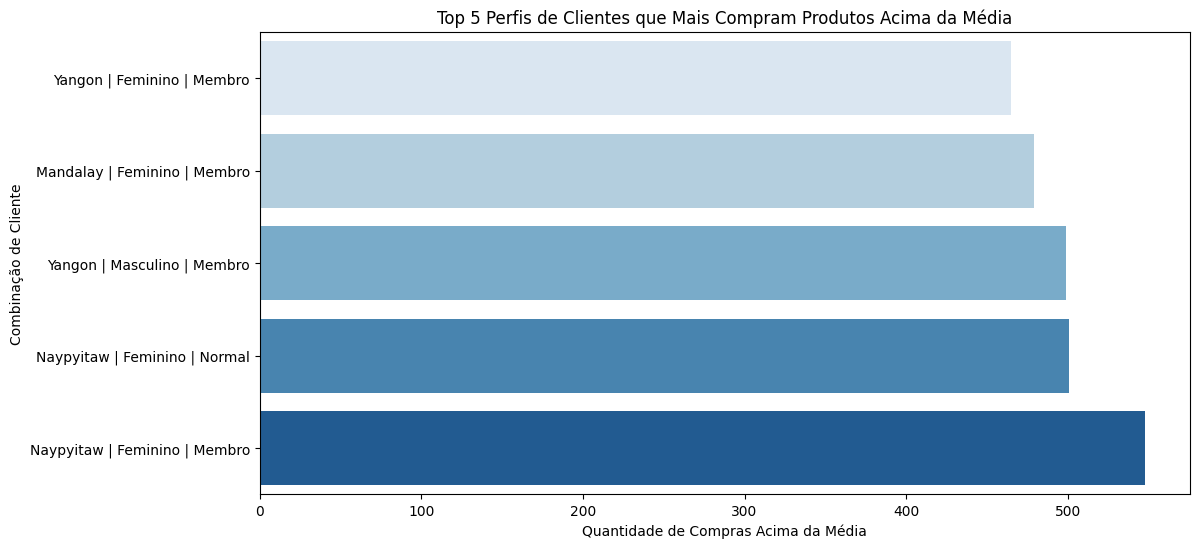

In [9]:
# Criar a coluna de combinação de forma segura
top5.loc[:, 'combinação'] = top5['cidade'] + ' | ' + top5['genero'] + ' | ' + top5['tipo_cliente']

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='quantidade', y='combinação', data=top5, palette='Blues_r', legend=False)

# Adicionar títulos e rótulos
plt.xlabel("Quantidade de Compras Acima da Média")
plt.ylabel("Combinação de Cliente")
plt.title("Top 5 Perfis de Clientes que Mais Compram Produtos Acima da Média")
plt.gca().invert_yaxis()  # Inverter para mostrar do maior para o menor

# Exibir o gráfico
plt.show()


**Qual é a sazonalidade das vendas? (Produtos que vendem mais em determinadas épocas do ano)**

Para responder temos que separar por categoria e por mês, depois disso vamos verificar se tem categorias que vendem mais dependendo do mês.

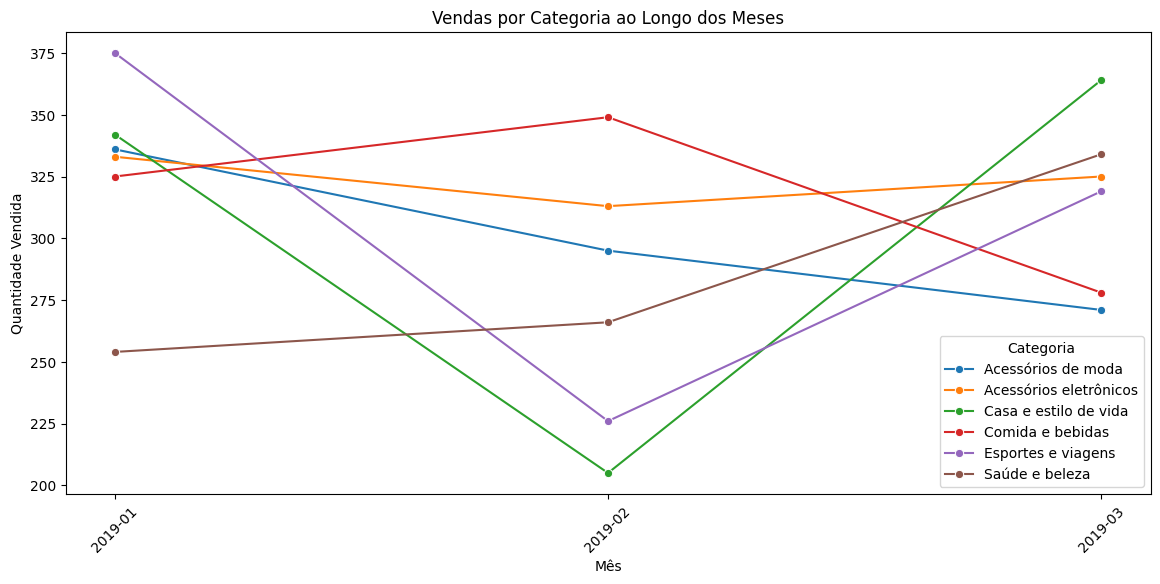

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que o dataset tenha uma coluna 'data_venda' e 'categoria'
df['data'] = pd.to_datetime(df['data'])  # Converter para datetime
df['mes'] = df['data'].dt.strftime('%Y-%m')   # Criar coluna de mês (Ano-Mês)

# Agrupar vendas por categoria e mês
vendas_por_categoria_mes = df.groupby(['mes', 'categoria'])['quantidade'].sum().reset_index()

# Criar o gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(data=vendas_por_categoria_mes, x='mes', y='quantidade', hue='categoria', marker='o')

# Ajustar labels
plt.xlabel("Mês")
plt.ylabel("Quantidade Vendida")
plt.title("Vendas por Categoria ao Longo dos Meses")
plt.xticks(rotation=45)
plt.legend(title="Categoria")

# Exibir o gráfico
plt.show()


**Quais produtos têm maior margem de lucro?**

Essa pergunta não tem como responder com a base de dados que foi fornecida, nesse caso a ideia seria marcar uma reunião com o responsável do estabelecimento e informá-lo que o percentual do lucro deve ser informado para cada categoria.

**Qual o perfil de cliente que mais compra determinado produto?**

Para reponder essa pergunta vamos agrupar os tipos de cliente por categorias de produtos

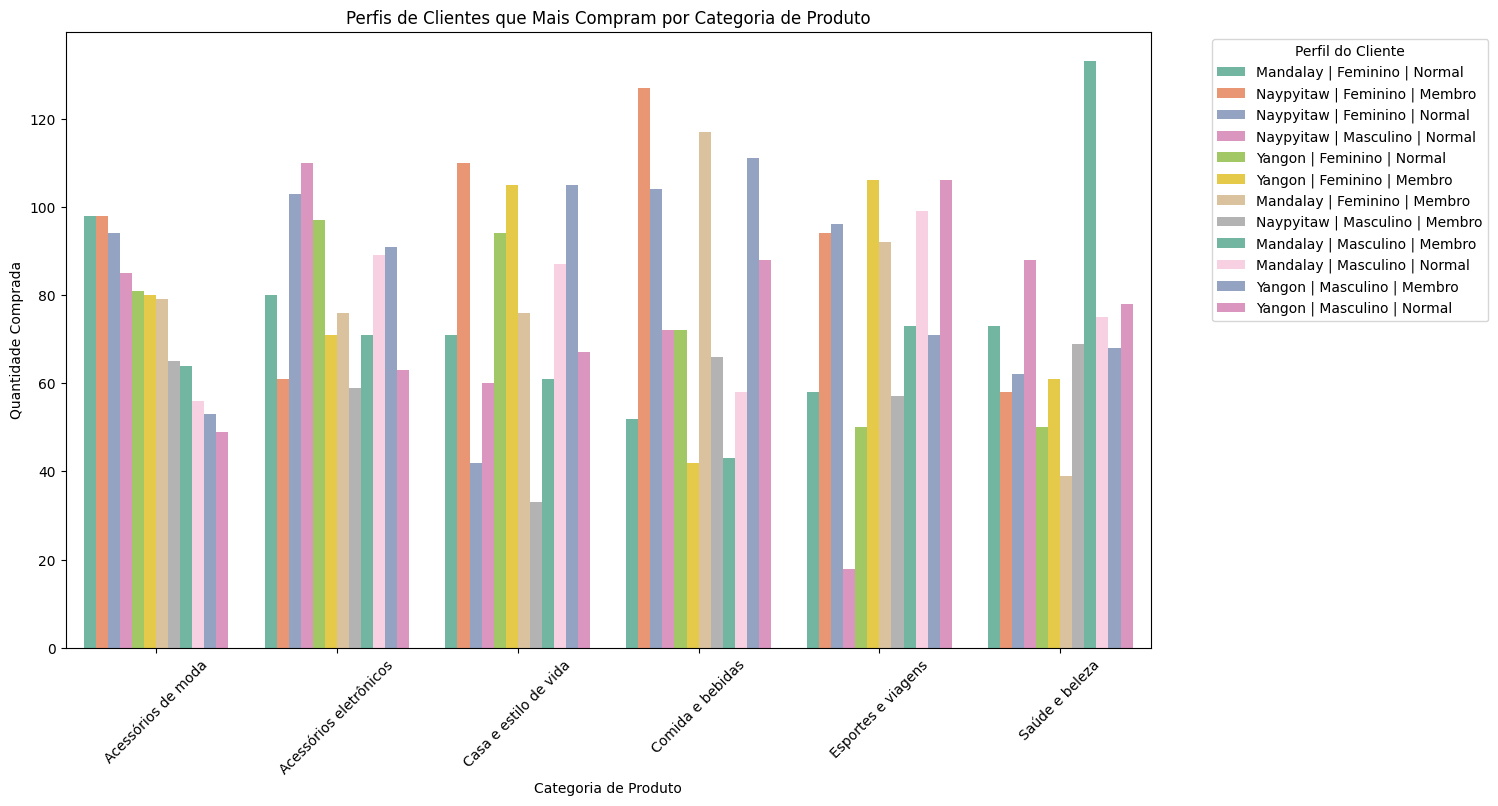

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar a coluna 'perfil_cliente' com todas as combinações
df['perfil_cliente'] = df['cidade'] + ' | ' + df['genero'] + ' | ' + df['tipo_cliente']

# Agrupar vendas por categoria de produto e perfil de cliente
vendas_por_perfil = df.groupby(['categoria', 'perfil_cliente'])['quantidade'].sum().reset_index()

# Ordenar para pegar os perfis com mais compras em cada categoria
vendas_por_perfil = vendas_por_perfil.sort_values(by=['categoria', 'quantidade'], ascending=[True, False])

# Definir cores personalizadas apenas para o perfil específico
cores_personalizadas = {
    'Mandalay | Masculino | Normal': '#fdcae1'  # Rosa claro
}

# Criar uma paleta de cores baseada na paleta original do Seaborn
paleta_original = sns.color_palette("Set2", n_colors=vendas_por_perfil['perfil_cliente'].nunique())

# Criar um dicionário de cores, mantendo as originais e substituindo apenas as desejadas
paleta_cores = {
    perfil: cores_personalizadas.get(perfil, cor)
    for perfil, cor in zip(vendas_por_perfil['perfil_cliente'].unique(), paleta_original)
}

# Criar gráfico de barras empilhadas
plt.figure(figsize=(14, 8))
sns.barplot(x='categoria', y='quantidade', hue='perfil_cliente', data=vendas_por_perfil, palette=paleta_cores)

# Ajustes visuais
plt.xlabel("Categoria de Produto")
plt.ylabel("Quantidade Comprada")
plt.title("Perfis de Clientes que Mais Compram por Categoria de Produto")
plt.xticks(rotation=45)
plt.legend(title="Perfil do Cliente", bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar legenda ao lado

# Exibir o gráfico
plt.show()


**Qual é a frequência de compras dos clientes?**

       mes                 perfil_cliente  quantidade
0  2019-01   Mandalay | Feminino | Membro         141
1  2019-01   Mandalay | Feminino | Normal         168
2  2019-01  Mandalay | Masculino | Membro         154
3  2019-01  Mandalay | Masculino | Normal         137
4  2019-01  Naypyitaw | Feminino | Membro         197


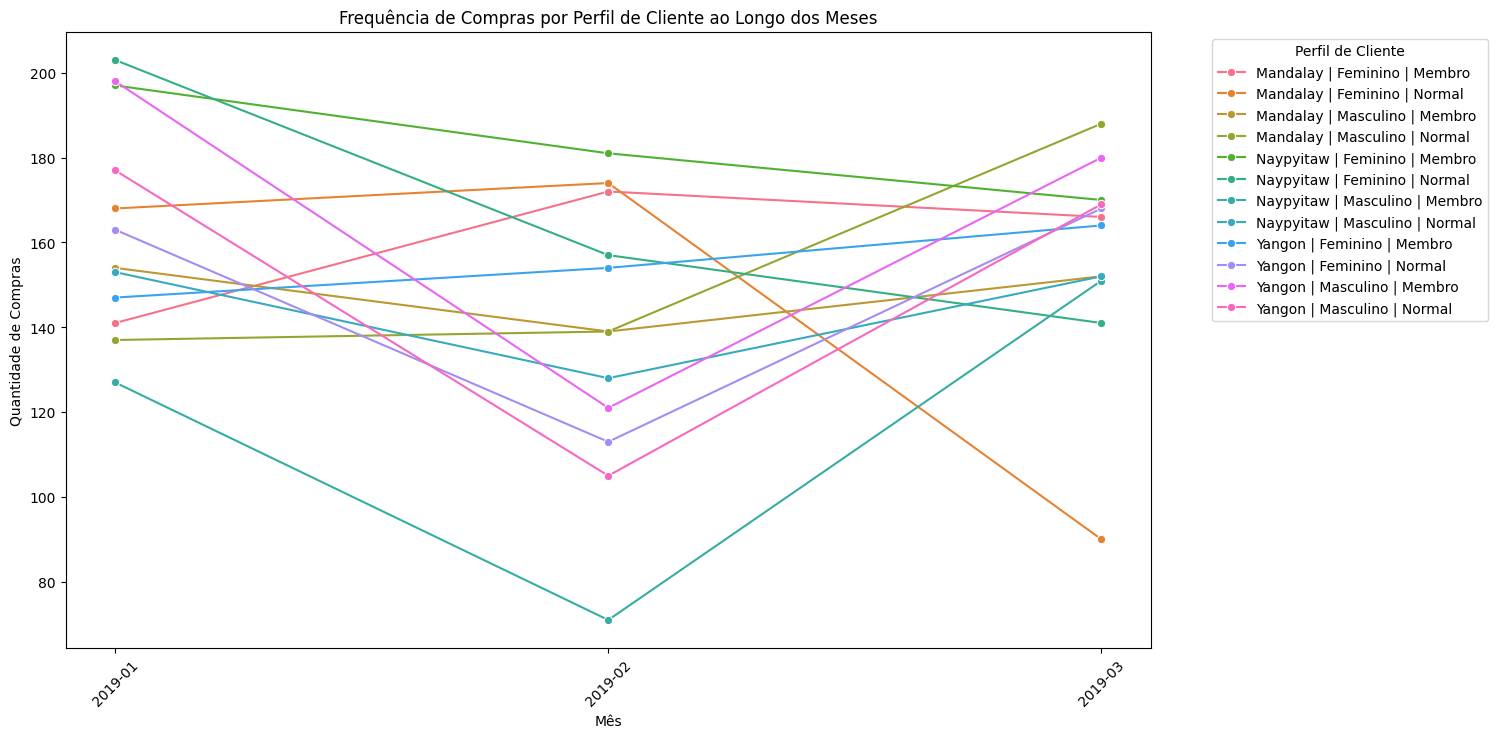

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna 'data' para o formato DateTime (caso não esteja)
df['data'] = pd.to_datetime(df['data'])

# Criar uma coluna 'mes' para representar o mês de cada venda (Ano-Mês)
df['mes'] = df['data'].dt.to_period('M')

# Criar a coluna 'perfil_cliente' combinando cidade, gênero e tipo
df['perfil_cliente'] = df['cidade'] + ' | ' + df['genero'] + ' | ' + df['tipo_cliente']

# Garantir que a coluna 'quantidade' seja numérica (forçando a conversão e tratando erros)
df['quantidade'] = pd.to_numeric(df['quantidade'], errors='coerce')

# Tratar possíveis valores nulos na coluna 'quantidade' (removendo ou substituindo por 0)
df = df.dropna(subset=['quantidade'])  # Para remover linhas com valores nulos

# Converter a coluna 'mes' para string no formato 'YYYY-MM'
df['mes'] = df['mes'].astype(str)

# Agrupar as compras por mês e perfil de cliente
vendas_por_mes_perfil = df.groupby(['mes', 'perfil_cliente'])['quantidade'].sum().reset_index()

# Verificar os dados agrupados para garantir que estão corretos
print(vendas_por_mes_perfil.head())

# Criar o gráfico de linha
plt.figure(figsize=(14, 8))
sns.lineplot(data=vendas_por_mes_perfil, x='mes', y='quantidade', hue='perfil_cliente', marker='o')

# Ajustes visuais
plt.xlabel("Mês")
plt.ylabel("Quantidade de Compras")
plt.title("Frequência de Compras por Perfil de Cliente ao Longo dos Meses")
plt.xticks(rotation=45)

# Mover a legenda para fora do gráfico
plt.legend(title='Perfil de Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()


# 5️⃣ Resolução do Problema


O principal desafio a ser solucionado é o aumento do ticket médio. Esse é um problema específico para cada cliente e envolve até mesmo aspectos científicos, pois exige a previsão dos comportamentos e decisões do consumidor. Ao antecipar esses passos, podemos influenciá-lo estrategicamente para aumentar seus gastos de forma natural e planejada.


---


Como aumentar o ticket médio?

*   Organizando estrategicamente a prateleira de acordo com a frequência que os produtos saem
*   Promoção dessas combinações

*   Organizar a prateleira com produtos mais caros com uma pequena diferença de preço

entre outros...

# Organizando estrategicamente a prateleira de acordo com a frequência que os produtos saem

De acordo com o gráfico de frequência de compras, podemos observar que quatro categorias de produtos se destacam em janeiro. Que tal colocá-las no mesmo corredor ou até mesmo na mesma prateleira?




 Esses pequenos detalhes podem influenciar diretamente o comportamento de compra e contribuir para o aumento do ticket médio dos clientes.


O próximo passo seria realizar testes para verificar se essa estratégia realmente aumenta o ticket médio. Caso contrário, novas análises seriam feitas para buscar outras soluções.

# Promoção dessas combinações

Outro ponto a ser considerado é a promoção dessas combinações. Com a organização das prateleiras de acordo com a frequência de compras, seria importante analisar quais produtos dessas categorias têm maior saída. A partir disso, poderiam ser feitas promoções direcionadas para esses produtos, testando se o aumento nas vendas contribui para um aumento ainda maior no ticket médio.

# Organizar a prateleira com produtos mais caros com uma pequena diferença de preço
Uma estratégia interessante seria aumentar o preço dos produtos de valor médio, de forma a reduzir a diferença entre esses e os produtos de maior valor. Ao fazer isso, os clientes perceberiam que a diferença de preço entre um produto de valor médio e um de maior qualidade e preço é pequena. Esse cenário pode levá-los a optar pelo produto de maior valor, já que a diferença financeira não é tão significativa. Dessa forma, o mercado aproveita para aumentar o ticket médio, incentivando os consumidores a escolherem opções de maior valor por um custo marginalmente maior.

# 6️⃣ Avaliação e Interpretação dos Resultados


Nessa etapa, as soluções previstas seriam analisadas para verificar se atingiram o resultado esperado pelo dono do mercado. Como se trata de um projeto de estudo e não uma implementação prática, infelizmente não poderemos seguir adiante. No entanto, o objetivo principal foi alcançado: a prática do pensamento crítico, bem como o desenvolvimento de habilidades na linguagem Python e suas bibliotecas. Esse exercício contribuiu significativamente para o aprendizado e aprimoramento de habilidades analíticas e técnicas.

---

# Percebeu o quanto é importante usar os dados para tomar decisões?
Se gostou desse projeto que fiz, e gostaria de tirar uma dúvida ou algum conselho/feedback.
Me mande mensagem em uma das minhas redes:
# 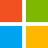 eduardafaculdade0306@gmail.com

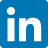 https://www.linkedin.com/in/eduarda-diniz-24a275272/
